In [1]:
import pandas as pd
import numpy as np
import os

데이터 전처리(누락값 제거)

In [2]:
df = pd.read_csv("C:/Users/seohe/OneDrive/바탕 화면/Thesis/dataset.csv", encoding='cp949')

In [3]:
df

,癤풳ser ID,Venue ID,Venue category ID,Venue category name,Latitude,Longitude,Timezone offset in minutes,UTC time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
...,...,...,...,...,...,...,...,...
65530,520,4b649083f964a5201dbe2ae3,4bf58dd8d48988d1e4931735,Bowling Alley,40.773181,-73.894966,-240,Sun May 13 22:27:23 +0000 2012
65531,210,4ed1b3bd8b81b473982a1b30,4bf58dd8d48988d121941735,Bar,40.973386,-74.071322,-240,Sun May 13 22:27:49 +0000 2012
65532,1054,4e5590b5814d6ce5cc849483,4d954b06a243a5684965b473,Residential Building (Apartment / Condo),40.870630,-74.097926,-240,Sun May 13 22:28:37 +0000 2012
65533,645,4abe905bf964a5207e8e20e3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.737601,-74.032009,-240,Sun May 13 22:28:38 +0000 2012


In [4]:
df[:20]

,癤풳ser ID,Venue ID,Venue category ID,Venue category name,Latitude,Longitude,Timezone offset in minutes,UTC time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,-240,Tue Apr 03 18:04:38 +0000 2012
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,-240,Tue Apr 03 18:04:42 +0000 2012
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,-240,Tue Apr 03 18:06:18 +0000 2012
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,-240,Tue Apr 03 18:06:19 +0000 2012


열네임
names = ['User ID','Venue ID','Venue category ID','Venue category name','Latitude','Longitude','Timezone offset in minutes','UTC time']


In [5]:
# 오류 행 제거

df=df.dropna(axis=0)

In [6]:
# 오류 행 제거 확인
df[:20]

,癤풳ser ID,Venue ID,Venue category ID,Venue category name,Latitude,Longitude,Timezone offset in minutes,UTC time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
5,484,4b5b981bf964a520900929e3,4bf58dd8d48988d118951735,Food & Drink Shop,40.690427,-73.954687,-240,Tue Apr 03 18:04:00 +0000 2012
6,642,4ab966c3f964a5203c7f20e3,4bf58dd8d48988d1e0931735,Coffee Shop,40.751591,-73.974121,-240,Tue Apr 03 18:04:38 +0000 2012
7,292,4d0cc47f903d37041864bf55,4bf58dd8d48988d12b951735,Bus Station,40.779422,-73.955341,-240,Tue Apr 03 18:04:42 +0000 2012
8,428,4ce1863bc4f6a35d8bd2db6c,4bf58dd8d48988d103941735,Home (private),40.619151,-74.035888,-240,Tue Apr 03 18:06:18 +0000 2012
9,877,4be319b321d5a59352311811,4bf58dd8d48988d10a951735,Bank,40.619006,-73.990375,-240,Tue Apr 03 18:06:19 +0000 2012


In [7]:
# df 누락 제거한 총값 확인
df

,癤풳ser ID,Venue ID,Venue category ID,Venue category name,Latitude,Longitude,Timezone offset in minutes,UTC time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
...,...,...,...,...,...,...,...,...
65530,520,4b649083f964a5201dbe2ae3,4bf58dd8d48988d1e4931735,Bowling Alley,40.773181,-73.894966,-240,Sun May 13 22:27:23 +0000 2012
65531,210,4ed1b3bd8b81b473982a1b30,4bf58dd8d48988d121941735,Bar,40.973386,-74.071322,-240,Sun May 13 22:27:49 +0000 2012
65532,1054,4e5590b5814d6ce5cc849483,4d954b06a243a5684965b473,Residential Building (Apartment / Condo),40.870630,-74.097926,-240,Sun May 13 22:28:37 +0000 2012
65533,645,4abe905bf964a5207e8e20e3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.737601,-74.032009,-240,Sun May 13 22:28:38 +0000 2012


In [17]:
df.to_csv('./df_dropna.csv')

8:2 trainset/testset 분할 (분석단계 : trainset으로 진행)

In [8]:
trainset=df[:52100]
testset=df[52100:]

In [9]:
trainset

,癤풳ser ID,Venue ID,Venue category ID,Venue category name,Latitude,Longitude,Timezone offset in minutes,UTC time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
...,...,...,...,...,...,...,...,...
52436,414,4ab8ed0ef964a520587d20e3,4bf58dd8d48988d137941735,Theater,40.764031,-73.983442,-240,Sun May 06 22:31:54 +0000 2012
52437,311,43e371d2f964a520dd2e1fe3,4bf58dd8d48988d1d0941735,Dessert Shop,40.721736,-73.995936,-240,Sun May 06 22:32:02 +0000 2012
52438,111,4b6708f9f964a52022362be3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.619103,-74.032872,-240,Sun May 06 22:33:11 +0000 2012
52439,372,4ac2a8abf964a520349a20e3,4bf58dd8d48988d1c1941735,Mexican Restaurant,40.798691,-73.941609,-240,Sun May 06 22:33:55 +0000 2012


In [18]:
trainset.to_csv('./trainset.csv')
testset.to_csv('./testset.csv')

In [10]:
# testset

User ID (Activity)

In [11]:
UserTable=[]
for i in trainset['癤풳ser ID']: 
    UserTable.append(i)

print((UserTable))
print(len(UserTable))

[470, 979, 69, 395, 87, 484, 642, 292, 428, 877, 87, 625, 691, 116, 53, 445, 135, 895, 704, 891, 284, 901, 803, 699, 100, 642, 443, 689, 390, 32, 230, 445, 834, 962, 1032, 525, 525, 962, 318, 1047, 738, 364, 398, 839, 424, 751, 1047, 889, 612, 643, 643, 1032, 718, 768, 15, 768, 458, 877, 280, 318, 839, 1016, 281, 366, 276, 135, 227, 612, 458, 80, 445, 673, 318, 337, 916, 639, 752, 713, 449, 1016, 803, 895, 1012, 749, 916, 438, 217, 656, 225, 628, 225, 504, 226, 164, 445, 235, 118, 1054, 881, 713, 706, 706, 673, 143, 1005, 706, 706, 912, 537, 406, 868, 1055, 751, 907, 303, 445, 793, 784, 793, 734, 540, 816, 623, 950, 294, 950, 1055, 615, 385, 615, 950, 950, 173, 292, 801, 16, 69, 467, 7, 592, 669, 574, 443, 436, 636, 865, 225, 621, 272, 1063, 591, 976, 562, 783, 319, 468, 874, 107, 281, 667, 718, 557, 725, 774, 976, 880, 1055, 288, 335, 335, 769, 562, 1063, 194, 100, 403, 573, 445, 834, 346, 1012, 968, 539, 976, 184, 184, 144, 865, 562, 734, 71, 688, 65, 885, 885, 592, 267, 976, 267, 88

In [12]:
" 중복 제거한 유저 아이디 : UserTable1 "
UserTable1 = []

for i in UserTable:
    if i not in UserTable1:
        UserTable1.append(i)
print(UserTable1)
print(len(UserTable1)) # 총 947 개의 유저id (in trainset)

[470, 979, 69, 395, 87, 484, 642, 292, 428, 877, 625, 691, 116, 53, 445, 135, 895, 704, 891, 284, 901, 803, 699, 100, 443, 689, 390, 32, 230, 834, 962, 1032, 525, 318, 1047, 738, 364, 398, 839, 424, 751, 889, 612, 643, 718, 768, 15, 458, 280, 1016, 281, 366, 276, 227, 80, 673, 337, 916, 639, 752, 713, 449, 1012, 749, 438, 217, 656, 225, 628, 504, 226, 164, 235, 118, 1054, 881, 706, 143, 1005, 912, 537, 406, 868, 1055, 907, 303, 793, 784, 734, 540, 816, 623, 950, 294, 615, 385, 173, 801, 16, 467, 7, 592, 669, 574, 436, 636, 865, 621, 272, 1063, 591, 976, 562, 783, 319, 468, 874, 107, 667, 557, 725, 774, 880, 288, 335, 769, 194, 403, 573, 346, 968, 539, 184, 144, 71, 688, 65, 885, 267, 820, 516, 176, 528, 30, 246, 515, 710, 145, 498, 894, 313, 120, 798, 598, 1078, 195, 59, 662, 425, 756, 553, 702, 620, 84, 129, 256, 864, 658, 951, 809, 817, 371, 121, 204, 420, 49, 50, 29, 519, 340, 1010, 117, 1034, 391, 526, 645, 258, 758, 653, 611, 47, 192, 455, 577, 984, 1025, 354, 373, 902, 571, 440, 

In [13]:
CheckIn = trainset['癤풳ser ID'].value_counts()
print(CheckIn)
print(CheckIn.mean()) # 55이하 inactive 유저? (쉬운 가정..)

354    557
706    417
84     388
768    380
527    370
      ... 
585      1
485      1
795      1
991      1
490      1
Name: 癤풳ser ID, Length: 947, dtype: int64
55.01583949313622


In [23]:
CheckIn.to_csv('./userID.csv')

FCM 

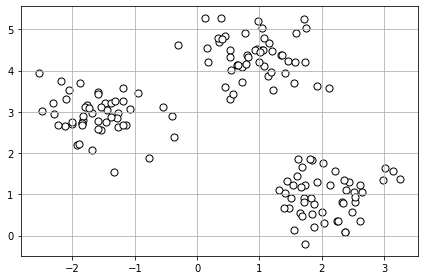

In [14]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from matplotlib import pyplot as plt

x, y = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=0)

plt.scatter(x[:, 0], x[:, 1], c='white', marker='o', edgecolors='black', s=50 )
plt.grid()
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=3, init="random", n_init=10, max_iter=300, tol=1e-04, random_state=0)
pred = kmeans.fit_predict

Activity = User ID {CheckIn, LocationFrequency, TimeDistribution}

In [15]:
# 카테고리 네임에서, 로케이션 DB를 따로 만들고 해당되면 갯수 세기 : LF 두번째항목
# 두번째 항목에서 유저의 활동 시간대 -> 3차원 위경도, 시간 : TD 세번째항목
# UniqueLocation=[]

# POI 추천장소 배제 
GL=['Office','Home (private)','Train Station','Bank','Subway','Hotel','Gym / Fitness Center',
       'Road','Medical Center','Building', 'Financial or Legal Service', 
       'Airport', 'Hardware Store', 'Airport', 'Post Office','Gas Station / Garage',
       'Drugstore / Pharmacy','Athletic & Sport','Neighborhood','Electronics Store',
       'Mobile Phone Shop', 'Automotive Shop','Parking'] 

In [16]:
trainset=trainset.dropna(axis=0)
trainset

,癤풳ser ID,Venue ID,Venue category ID,Venue category name,Latitude,Longitude,Timezone offset in minutes,UTC time
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012
...,...,...,...,...,...,...,...,...
52436,414,4ab8ed0ef964a520587d20e3,4bf58dd8d48988d137941735,Theater,40.764031,-73.983442,-240,Sun May 06 22:31:54 +0000 2012
52437,311,43e371d2f964a520dd2e1fe3,4bf58dd8d48988d1d0941735,Dessert Shop,40.721736,-73.995936,-240,Sun May 06 22:32:02 +0000 2012
52438,111,4b6708f9f964a52022362be3,4bf58dd8d48988d1d2941735,Sushi Restaurant,40.619103,-74.032872,-240,Sun May 06 22:33:11 +0000 2012
52439,372,4ac2a8abf964a520349a20e3,4bf58dd8d48988d1c1941735,Mexican Restaurant,40.798691,-73.941609,-240,Sun May 06 22:33:55 +0000 2012
